In [1]:
import gzip
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils  import to_categorical

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)


Num GPUs Available:  1


In [2]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")
!ls -l 8_faces_train_and_valid.hdf5

-rw-r--r-- 1 simon users 132733792 20. Dez 18:34 8_faces_train_and_valid.hdf5


In [3]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']


/home/simon/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


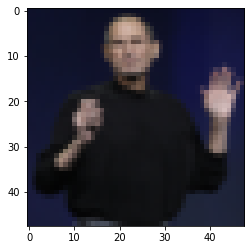

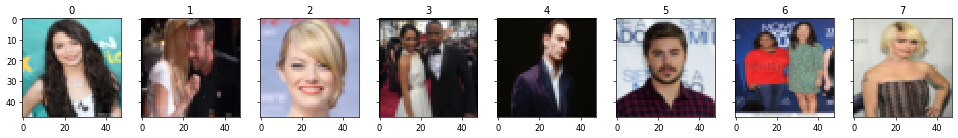

In [4]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))
plt.show()
fig, axes = plt.subplots(1, 8, figsize=(20,10),dpi=60, sharex=True, sharey=True)

for i in range(8):
    idx = np.where(Y_train == i)[0]
    random.shuffle(idx)
    axes[i].imshow(np.asarray(X_train[idx[0]],dtype='uint8'))
    axes[i].set_title(i)
    


In [5]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

def normalize(data):
    data = tf.image.per_image_standardization(data)
    return np.array(data)
    
    
def rgb2gray(rgb):
    img = np.zeros(rgb.shape)
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    img[:,:,0] = gray
    img[:,:,1] = gray
    img[:,:,2] = gray
    
    return img


#train_x = np.array([ rgb2gray(img) for img in X_train ])
#train_x = X_train
#test_x = X_test
train_x = normalize(X_train)
test_x = normalize(X_test)
#test_x = np.array([ rgb2gray(img) for img in X_test ])
"""
fig, axes = plt.subplots(1, 8, figsize=(20,10),dpi=60, sharex=True, sharey=True)
for i in range(8):
    idx = np.where(Y_train == i)[0]
    random.shuffle(idx)
    axes[i].imshow(np.asarray(train_x[idx[0]],dtype='uint8'))
    axes[i].set_title(i)
"""
x_train = train_x.astype('float32')
x_test = test_x.astype('float32')

#x_train /= 255
#x_test /= 255
print(x_train.max())
print(x_train.min())
print(train_x.mean())
print(train_x.std())

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
7.1191
-5.0573754
-1.62235758160989e-10
1.000000001205729


In [6]:
model = Sequential()
num_classes = 8
kernel_size = (3,3)
size = train_x.shape[1:]
input_shape = (train_x.shape[1:])
model.add(Conv2D(15, kernel_size,
                 input_shape=input_shape,
                 padding="same",
                 use_bias=True))
model.add(Activation('relu'))
model.add(Conv2D(15, kernel_size,
                 padding="same",
                 use_bias=True))


model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2 )))
model.add(Conv2D(30, kernel_size,
                 padding="same",
                 use_bias=True))

model.add(Activation('relu'))

model.add(Conv2D(30, kernel_size,
                 padding="same",
                 use_bias=True))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4 )))
model.add(Flatten())
model.add(Dense(300))
model.add(Activation('softmax'))
#model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(num_classes))
#model.add(Activation('softmax'))




model = Sequential()
model.add(Conv2D(15, kernel_size,
                 input_shape=input_shape,
                 padding="same",
                 activation='relu'))
model.add(Conv2D(15, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2 )))
model.add(Conv2D(30, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(30, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 15)        420       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 30)        8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1080)             

In [7]:
batch_size = 10
epochs = 100
opt = RMSprop(learning_rate=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


history = model.fit(train_x, to_categorical(Y_train,num_classes=8),
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_x, to_categorical(Y_test,num_classes=8)),
              shuffle=True)

print()


Train on 2000 samples, validate on 400 samples
Epoch 1/100
2000/2000 [==============================] - 9s 4ms/sample - loss: 1.9131 - accuracy: 0.2720 - val_loss: 1.5233 - val_accuracy: 0.4425
Epoch 2/100
2000/2000 [==============================] - 1s 446us/sample - loss: 1.4942 - accuracy: 0.4620 - val_loss: 1.2819 - val_accuracy: 0.5975
Epoch 3/100
2000/2000 [==============================] - 1s 445us/sample - loss: 1.2306 - accuracy: 0.5580 - val_loss: 1.1879 - val_accuracy: 0.5900
Epoch 4/100
2000/2000 [==============================] - 1s 441us/sample - loss: 1.0171 - accuracy: 0.6490 - val_loss: 0.9876 - val_accuracy: 0.6425
Epoch 5/100
2000/2000 [==============================] - 1s 435us/sample - loss: 0.8425 - accuracy: 0.7070 - val_loss: 0.9732 - val_accuracy: 0.6775
Epoch 6/100
2000/2000 [==============================] - 1s 441us/sample - loss: 0.6853 - accuracy: 0.7605 - val_loss: 0.9394 - val_accuracy: 0.6700
Epoch 7/100
2000/2000 [==============================] - 1s 4

2000/2000 [==============================] - 1s 432us/sample - loss: 0.0818 - accuracy: 0.9830 - val_loss: 5.7898 - val_accuracy: 0.7000
Epoch 56/100
2000/2000 [==============================] - 1s 439us/sample - loss: 0.0750 - accuracy: 0.9830 - val_loss: 4.3125 - val_accuracy: 0.6925
Epoch 57/100
2000/2000 [==============================] - 1s 457us/sample - loss: 0.0846 - accuracy: 0.9800 - val_loss: 4.3616 - val_accuracy: 0.6750
Epoch 58/100
2000/2000 [==============================] - 1s 440us/sample - loss: 0.0668 - accuracy: 0.9885 - val_loss: 4.9867 - val_accuracy: 0.6700
Epoch 59/100
2000/2000 [==============================] - 1s 437us/sample - loss: 0.0852 - accuracy: 0.9865 - val_loss: 5.3217 - val_accuracy: 0.6900
Epoch 60/100
2000/2000 [==============================] - 1s 446us/sample - loss: 0.1141 - accuracy: 0.9735 - val_loss: 4.2651 - val_accuracy: 0.6925
Epoch 61/100
2000/2000 [==============================] - 1s 421us/sample - loss: 0.1053 - accuracy: 0.9800 - val

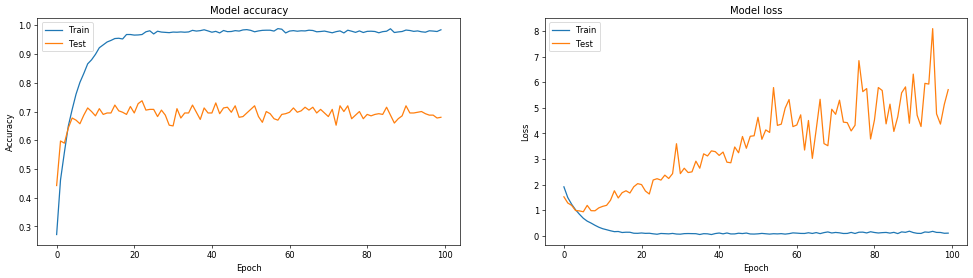

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20,5),dpi=60, sharex=False, sharey=False)

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:


from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))



In [10]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

In [11]:


fc1 = base_model.output
fc1 = Flatten()(fc1)
fc1 = Dense(512,activation='relu', name='my_dense1')(fc1)
fc1 = Dense(512,activation='relu', name='my_dense2')(fc1)
fc1 = Dense(100,activation='relu', name='my_dense3')(fc1)
fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
#model_trans.summary()



In [12]:
#base_model.summary()
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [13]:
model_trans.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [14]:
batch_size = 10
epochs = 100
opt = RMSprop(learning_rate=0.001, decay=1e-6)
model_trans.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model_trans.fit(train_x, to_categorical(Y_train,num_classes=8),
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, to_categorical(Y_test,num_classes=8)),
              shuffle=True)

Train on 2000 samples, validate on 400 samples
Epoch 1/100
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.6028 - accuracy: 0.4330 - val_loss: 1.5210 - val_accuracy: 0.4525
Epoch 2/100
2000/2000 [==============================] - 1s 657us/sample - loss: 1.0974 - accuracy: 0.6135 - val_loss: 1.2949 - val_accuracy: 0.5425
Epoch 3/100
2000/2000 [==============================] - 1s 656us/sample - loss: 0.7547 - accuracy: 0.7440 - val_loss: 1.3025 - val_accuracy: 0.5750
Epoch 4/100
2000/2000 [==============================] - 1s 656us/sample - loss: 0.4916 - accuracy: 0.8265 - val_loss: 1.4170 - val_accuracy: 0.6075
Epoch 5/100
2000/2000 [==============================] - 1s 654us/sample - loss: 0.3152 - accuracy: 0.8925 - val_loss: 1.8398 - val_accuracy: 0.5825
Epoch 6/100
2000/2000 [==============================] - 1s 652us/sample - loss: 0.2036 - accuracy: 0.9305 - val_loss: 2.2257 - val_accuracy: 0.5925
Epoch 7/100
2000/2000 [==============================] - 1s 6

2000/2000 [==============================] - 1s 666us/sample - loss: 0.0103 - accuracy: 0.9965 - val_loss: 10.2048 - val_accuracy: 0.6150
Epoch 56/100
2000/2000 [==============================] - 1s 680us/sample - loss: 0.0194 - accuracy: 0.9965 - val_loss: 10.2224 - val_accuracy: 0.6200
Epoch 57/100
2000/2000 [==============================] - 1s 672us/sample - loss: 0.0191 - accuracy: 0.9965 - val_loss: 11.2222 - val_accuracy: 0.6100
Epoch 58/100
2000/2000 [==============================] - 1s 679us/sample - loss: 0.0239 - accuracy: 0.9970 - val_loss: 11.8891 - val_accuracy: 0.5975
Epoch 59/100
2000/2000 [==============================] - 1s 669us/sample - loss: 0.0017 - accuracy: 0.9995 - val_loss: 11.4261 - val_accuracy: 0.6050
Epoch 60/100
2000/2000 [==============================] - 1s 675us/sample - loss: 0.0302 - accuracy: 0.9940 - val_loss: 10.5767 - val_accuracy: 0.6050
Epoch 61/100
2000/2000 [==============================] - 1s 690us/sample - loss: 0.0028 - accuracy: 0.9990

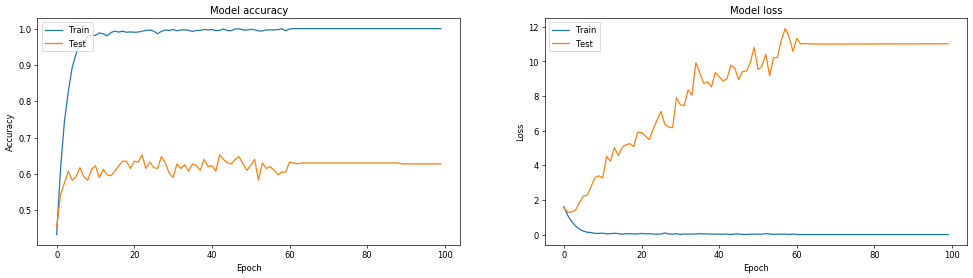

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20,5),dpi=60, sharex=False, sharey=False)

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Input

Using TensorFlow backend.


In [17]:
model = Sequential()
num_classes = 8
kernel_size = (3,3)
size = train_x.shape[1:]
input_shape = (train_x.shape[1:])




model_improved = Sequential()
model_improved.add(Conv2D(15, kernel_size,
                 input_shape=input_shape,
                 padding="same",
                 activation='relu'))
model_improved.add(Conv2D(64, (3, 3), padding="same"))
model_improved.add(Activation('relu'))
model_improved.add(MaxPooling2D(pool_size=(2,2 )))
model_improved.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
#model_improved.add(BatchNormalization())
model_improved.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model_improved.add(MaxPooling2D(pool_size=(2,2)))
model_improved.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model_improved.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
#model_improved.add(MaxPooling2D(pool_size=(2,2)))
model_improved.add(MaxPooling2D(pool_size=(2,2)))
model_improved.add(Flatten())
model_improved.add(Dense(1024))
model_improved.add(Activation('relu'))
model_improved.add(Dropout(0.2, noise_shape=None, seed=None))
model_improved.add(Dense(400))
model_improved.add(Activation('relu'))
model_improved.add(Dropout(0.2, noise_shape=None, seed=None))
model_improved.add(Dense(num_classes))
model_improved.add(Activation('softmax'))

model_improved.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 15)        420       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        8704      
_________________________________________________________________
activation_7 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)      

In [18]:
x_train = X_train.copy()
x_test = X_test.copy()
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

batch_size = 50
epochs = 150
opt = Adam(learning_rate=0.001, decay=1e-6)
model_improved.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

improved_hist = model_improved.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data = datagen.flow(x_test, y_test, batch_size=batch_size))

Epoch 1/150
40/40 [==============================] - 3s 66ms/step - loss: 2.0304 - accuracy: 0.1890 - val_loss: 2.0368 - val_accuracy: 0.1475
Epoch 2/150
40/40 [==============================] - 2s 57ms/step - loss: 1.9454 - accuracy: 0.2455 - val_loss: 1.9551 - val_accuracy: 0.2325
Epoch 3/150
40/40 [==============================] - 2s 51ms/step - loss: 1.8869 - accuracy: 0.2725 - val_loss: 1.8052 - val_accuracy: 0.2950
Epoch 4/150
40/40 [==============================] - 2s 55ms/step - loss: 1.7990 - accuracy: 0.3075 - val_loss: 1.7263 - val_accuracy: 0.3675
Epoch 5/150
40/40 [==============================] - 2s 51ms/step - loss: 1.7147 - accuracy: 0.3675 - val_loss: 1.6165 - val_accuracy: 0.3925
Epoch 6/150
40/40 [==============================] - 2s 53ms/step - loss: 1.6334 - accuracy: 0.3885 - val_loss: 1.6497 - val_accuracy: 0.4050
Epoch 7/150
40/40 [==============================] - 2s 53ms/step - loss: 1.5338 - accuracy: 0.4370 - val_loss: 1.3922 - val_accuracy: 0.4900
Epoch 

40/40 [==============================] - 2s 57ms/step - loss: 0.1905 - accuracy: 0.9380 - val_loss: 0.6829 - val_accuracy: 0.8175
Epoch 59/150
40/40 [==============================] - 2s 57ms/step - loss: 0.2008 - accuracy: 0.9285 - val_loss: 0.8556 - val_accuracy: 0.7775
Epoch 60/150
40/40 [==============================] - 2s 58ms/step - loss: 0.2064 - accuracy: 0.9300 - val_loss: 0.7117 - val_accuracy: 0.7875
Epoch 61/150
40/40 [==============================] - 2s 58ms/step - loss: 0.2099 - accuracy: 0.9330 - val_loss: 0.5998 - val_accuracy: 0.8300
Epoch 62/150
40/40 [==============================] - 2s 53ms/step - loss: 0.2108 - accuracy: 0.9340 - val_loss: 0.7247 - val_accuracy: 0.7950
Epoch 63/150
40/40 [==============================] - 2s 54ms/step - loss: 0.2010 - accuracy: 0.9320 - val_loss: 0.7165 - val_accuracy: 0.8050
Epoch 64/150
40/40 [==============================] - 2s 58ms/step - loss: 0.1649 - accuracy: 0.9460 - val_loss: 0.8374 - val_accuracy: 0.7950
Epoch 65/150

40/40 [==============================] - 2s 45ms/step - loss: 0.0815 - accuracy: 0.9705 - val_loss: 0.8324 - val_accuracy: 0.8075
Epoch 116/150
40/40 [==============================] - 2s 45ms/step - loss: 0.1075 - accuracy: 0.9645 - val_loss: 0.6250 - val_accuracy: 0.8375
Epoch 117/150
40/40 [==============================] - 2s 45ms/step - loss: 0.0988 - accuracy: 0.9645 - val_loss: 0.7186 - val_accuracy: 0.8225
Epoch 118/150
40/40 [==============================] - 2s 45ms/step - loss: 0.1439 - accuracy: 0.9525 - val_loss: 0.7800 - val_accuracy: 0.8175
Epoch 119/150
40/40 [==============================] - 2s 45ms/step - loss: 0.1420 - accuracy: 0.9550 - val_loss: 0.6983 - val_accuracy: 0.8175
Epoch 120/150
40/40 [==============================] - 2s 45ms/step - loss: 0.0732 - accuracy: 0.9740 - val_loss: 0.6429 - val_accuracy: 0.8275
Epoch 121/150
40/40 [==============================] - 2s 44ms/step - loss: 0.0654 - accuracy: 0.9765 - val_loss: 0.7791 - val_accuracy: 0.8175
Epoch 

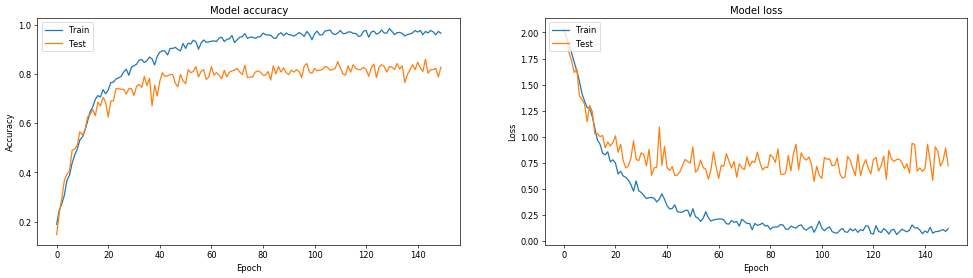

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20,5),dpi=60, sharex=False, sharey=False)

axes[0].plot(improved_hist.history['accuracy'])
axes[0].plot(improved_hist.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(improved_hist.history['loss'])
axes[1].plot(improved_hist.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='upper left')
plt.show()